### Affichage d’images locales dans un notebook Jupyter

- **`from IPython.display import Image`** : importe la fonction `Image` permettant d’afficher des fichiers image directement dans un environnement Jupyter Notebook.

- **`Image("/home/mxrtixn/Documents/Fleurs/IRIS1.png")`**,  
  **`Image("/home/mxrtixn/Documents/Fleurs/IRIS2.png")`**,  
  **`Image("/home/mxrtixn/Documents/Fleurs/IRIS3.png")`** :  
  affichent respectivement les images situées dans le répertoire spécifié sur la machine locale.  
  Chaque instruction affiche une image (ici des fichiers `.png`) dans une cellule du notebook.

Cette approche est utilisée pour **intégrer des images externes** (par exemple, des graphiques ou des visualisations d’arbres) directement dans le notebook afin d’enrichir la présentation des résultats.


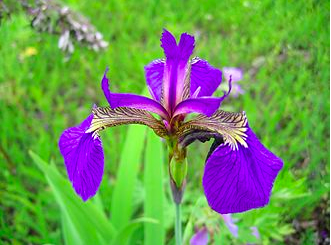

In [2]:
from IPython.display import Image
Image("/home/mxrtixn/Documents/Fleurs/IRIS1.png")

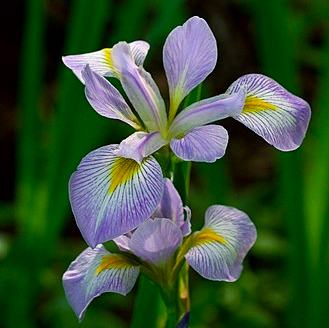

In [3]:
from IPython.display import Image
Image("/home/mxrtixn/Documents/Fleurs/IRIS2.png")

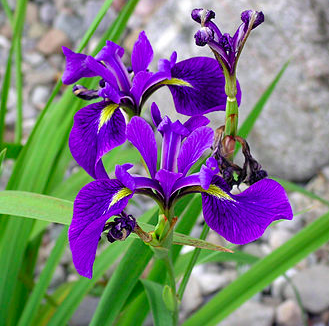

In [4]:
from IPython.display import Image
Image("/home/mxrtixn/Documents/Fleurs/IRIS3.png")

### Chargement des bibliothèques nécessaires pour le clustering (K-Means)

- **`import pandas as pd`** : importe la bibliothèque **Pandas**, utilisée pour manipuler les données sous forme de tableaux (DataFrames).  
  Elle permet de charger, analyser et transformer les jeux de données.

- **`import numpy as np`** : importe la bibliothèque **NumPy**, essentielle pour les calculs numériques et la manipulation de tableaux multidimensionnels.

- **`import sklearn.metrics as sm`** : importe le module **metrics** de scikit-learn sous l’alias `sm`.  
  Il contient les fonctions d’évaluation des modèles, comme le calcul du score d’ajustement ou des indices de similarité.

- **`import matplotlib.pyplot as plt`** : importe la bibliothèque **Matplotlib**, utilisée pour créer des graphiques (visualisation des clusters, courbes, etc.).

- **`from sklearn.cluster import KMeans`** : importe la classe **KMeans**, qui permet d’appliquer l’algorithme de **clustering non supervisé** K-Means pour regrouper des données en plusieurs clusters.

- **`from sklearn import datasets`** : donne accès à plusieurs jeux de données intégrés à scikit-learn, comme *Iris* ou *Digits*, souvent utilisés pour les démonstrations de clustering.

Ces bibliothèques constituent la base nécessaire pour réaliser une **analyse de regroupement (clustering)** avec l’algorithme **K-Means**.


In [5]:
#Chargement des bibliothèques
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

### Chargement du jeu de données Iris

- **`iris = datasets.load_iris()`** : charge le célèbre **jeu de données Iris** intégré à scikit-learn.  
  Ce dataset est largement utilisé pour les démonstrations de classification et de clustering.

Le jeu de données **Iris** contient :
- **150 échantillons** de fleurs appartenant à trois espèces :
  - *Iris setosa*
  - *Iris versicolor*
  - *Iris virginica*
- Chaque échantillon comporte **4 caractéristiques (features)** :
  - longueur du sépale  
  - largeur du sépale  
  - longueur du pétale  
  - largeur du pétale  

Cet ensemble de données est souvent utilisé pour tester des algorithmes de **K-Means** ou de **classification supervisée**.


In [6]:
#chargement de jeu des données Iris
iris = datasets.load_iris()

- **`iris`** : affiche le contenu complet de l’objet retourné par `datasets.load_iris()`.

L’objet `iris` est de type **`sklearn.utils.Bunch`**, une structure similaire à un dictionnaire.  

In [7]:
#Affichage des données
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Affichage détaillé du jeu de données Iris

- **`print(iris)`** : affiche l’intégralité du contenu de l’objet `iris` dans la console.

Le résultat montre la structure complète du jeu de données, avec les principaux éléments suivants :

- **`data`** : tableau contenant les valeurs numériques des caractéristiques (4 colonnes pour chaque fleur).  
- **`target`** : tableau indiquant la classe (0, 1 ou 2) correspondant à l’espèce de chaque fleur.  
- **`feature_names`** : liste des noms des caractéristiques mesurées :  
  `['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`.  
- **`target_names`** : liste des trois espèces d’iris :  
  `['setosa', 'versicolor', 'virginica']`.  
- **`DESCR`** : une description textuelle du dataset, précisant sa source, ses dimensions et ses objectifs.

L’utilisation de `print(iris)` permet donc de **visualiser la structure complète** du jeu de données et de **comprendre sa composition** avant toute manipulation ou modélisation.


### Différence entre `iris` et `print(iris)`

- **`iris`** :  
  Lorsqu’on tape simplement `iris` dans un environnement **interactif** (comme Jupyter Notebook ou IPython), Python affiche automatiquement une **représentation structurée** de l’objet.  
  Cette représentation est générée par la méthode interne `__repr__()` et est conçue pour être **plus lisible** et **plus concise**.  
  Elle permet de visualiser rapidement le contenu de l’objet sans surcharger la sortie.

- **`print(iris)`** :  
  Utilise la fonction `print()` pour afficher la **représentation textuelle complète** de l’objet, produite par la méthode `__str__()`.  
  L’affichage est souvent **plus brut** et **moins lisible**, car tout le contenu est imprimé en continu, sans mise en forme adaptée.

- **En résumé :**  
  - Dans un **notebook Jupyter**, taper simplement `iris` suffit pour obtenir un affichage clair et structuré.  
  - Dans un **script Python classique (.py)** ou dans un terminal, il faut utiliser `print(iris)` pour voir le contenu, car rien ne s’affiche sans appel explicite à `print()`.


In [8]:
#affichage des données, vous permet de mieux comprendre le jeu de données (opt
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Affichage des données numériques du jeu de données Iris

- **`print(iris.data)`** : affiche la **matrice des caractéristiques (features)** du jeu de données Iris.

Le résultat est un **tableau NumPy** de dimension `(150, 4)` :
- **150 lignes** → chaque ligne correspond à une fleur observée.  
- **4 colonnes** → chaque colonne représente une caractéristique mesurée :
  1. longueur du sépale (en cm)  
  2. largeur du sépale (en cm)  
  3. longueur du pétale (en cm)  
  4. largeur du pétale (en cm)

Ces données constituent les **entrées (X)** du modèle de machine learning, utilisées pour regrouper ou classer les différentes espèces de fleurs d’iris.


In [9]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Affichage des noms des caractéristiques du jeu de données Iris

- **`print(iris.feature_names)`** : affiche la **liste des noms des variables (ou caractéristiques)** mesurées pour chaque fleur du jeu de données.
Le résultat est une liste de quatre chaînes de caractères représentant les dimensions des sépales et des pétales :
- **`sepal length (cm)`** : longueur du sépale  
- **`sepal width (cm)`** : largeur du sépale  
- **`petal length (cm)`** : longueur du pétale  
- **`petal width (cm)`** : largeur du pétale  

Ces noms de caractéristiques facilitent l’interprétation des données et permettent d’associer chaque colonne de `iris.data` à une mesure spécifique de la fleur.

In [10]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Affichage des étiquettes cibles du jeu de données Iris

- **`print(iris.target)`** : affiche le **vecteur des étiquettes (ou classes)** associées à chaque échantillon du jeu de données.

Le résultat est un tableau NumPy de 150 valeurs entières

Chaque nombre correspond à une espèce d’iris :

- `0` *Iris setosa*  
- `1` *Iris versicolor*  
- `2` *Iris virginica*  

Ce vecteur représente donc la **variable cible (target)** du modèle, utilisée pour l’apprentissage supervisé ou pour comparer les résultats d’un clustering non supervisé.


In [11]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Affichage des noms des classes du jeu de données Iris

- **`print(iris.target_names)`** : affiche la **liste des noms des classes** correspondant aux étiquettes numériques présentes dans `iris.target`.

Le résultat est :
['setosa' 'versicolor' 'virginica']

Ces trois noms représentent les **espèces de fleurs d’iris** incluses dans le jeu de données :

1. **`setosa`** → étiquette `0`  
2. **`versicolor`** → étiquette `1`  
3. **`virginica`** → étiquette `2`

Ces informations permettent d’interpréter les valeurs du vecteur `iris.target` et d’associer chaque chiffre à l’espèce réelle correspondante.


In [ ]:
print(iris.target_names)

In [15]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
#importer le jeu de données Iris dataset à l'aide du module pandas
x=pd.DataFrame(iris.data)
x
x.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
x

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Création du DataFrame des étiquettes cibles (Targets)

- **`y = pd.DataFrame(iris.target)`** :  
  crée un **DataFrame Pandas** contenant les valeurs de la variable cible du jeu de données Iris (`iris.target`).  
  Chaque valeur numérique représente une espèce de fleur :
  - `0` → *Iris setosa*  
  - `1` → *Iris versicolor*  
  - `2` → *Iris virginica*

- **`y.columns = ['Targets']`** :  
  renomme la colonne du DataFrame en **`Targets`** pour indiquer clairement qu’il s’agit des classes à prédire.

Le DataFrame `y` contient donc :
- **150 lignes**, une pour chaque fleur.  
- **1 colonne**, appelée `Targets`, qui indique la classe correspondante à chaque observation.

Ce DataFrame peut ensuite être combiné avec `x` pour former un jeu de données complet utilisable pour l’apprentissage supervisé ou le clustering.


In [14]:
y=pd.DataFrame(iris.target)
y.columns=['Targets']
y

,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Application de l’algorithme K-Means sur le jeu de données Iris

- **`model = KMeans(n_clusters=3)`** :  
  crée un modèle de **clustering K-Means** avec `3` clusters (groupes).  
  Le choix de 3 vient du fait que le jeu de données Iris contient **3 espèces de fleurs** différentes :
  - *Iris setosa*  
  - *Iris versicolor*  
  - *Iris virginica*

- **`model.fit(x)`** :  
  entraîne (ou ajuste) le modèle K-Means sur les données `x`, c’est-à-dire les **caractéristiques** des fleurs (longueur et largeur des sépales et pétales).  
  L’algorithme va :
  1. Sélectionner aléatoirement 3 centres initiaux (centroïdes).  
  2. Affecter chaque observation au centre le plus proche.  
  3. Recalculer les centres en fonction des points assignés.  
  4. Répéter ce processus jusqu’à stabilisation.

À la fin de cette étape, le modèle a **formé 3 groupes de données similaires** selon leurs caractéristiques, sans utiliser les vraies étiquettes (`y`).


In [25]:
#Appliquer k-means sur l'ensemble de données en demandant une répartion en 3
model=KMeans(n_clusters=3)
model.fit(x)

### Affichage des étiquettes prédites par le modèle K-Means

- **`model.labels_`** :  
  renvoie un **tableau NumPy** contenant les **étiquettes de cluster** attribuées par le modèle à chaque échantillon du jeu de données.

Chaque valeur correspond au **numéro du cluster** (0, 1 ou 2) auquel K-Means a associé une fleur, en fonction de ses caractéristiques :

Ces étiquettes ne correspondent pas nécessairement aux vraies classes (`iris.target`),  
car K-Means est un **algorithme non supervisé** : il crée des groupes selon les **similarités des données**, sans connaître les catégories réelles.

In [27]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Visualisation simple de la répartition des données de l’Iris Dataset

- **`plt.scatter(x.Petal_Length, x.Petal_width)`** :  
  trace un **nuage de points (scatter plot)** représentant les fleurs en fonction de deux caractéristiques :
  - **Axe X →** la longueur du pétale (*Petal_Length*)  
  - **Axe Y →** la largeur du pétale (*Petal_width*)  

  Chaque point correspond à une fleur du jeu de données.  
  À ce stade, les points ne sont pas encore colorés selon les clusters, donc tous apparaissent dans la même couleur.

- **`plt.title('Répartition de l’Iris Dataset dans un scatter plot 2D')`** :  
  ajoute un **titre au graphique**, indiquant qu’il s’agit de la répartition bidimensionnelle du jeu de données Iris.

Ce graphique permet d’avoir une première **visualisation de la structure des données**, en montrant comment les fleurs se répartissent selon la longueur et la largeur de leurs pétales — deux caractéristiques particulièrement discriminantes pour distinguer les espèces.


Text(0.5, 1.0, 'Répartition de l’Iris Dataset dans un scatter plot 2D')

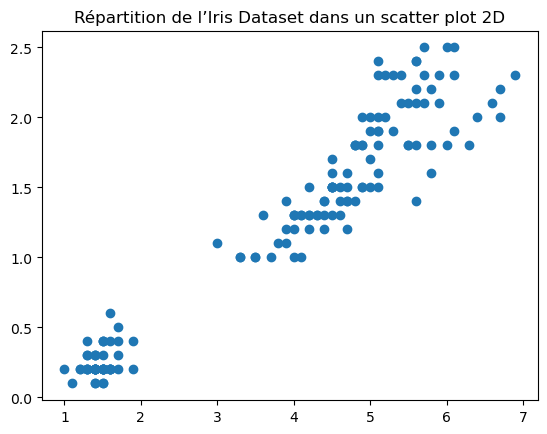

In [28]:
#Visualisation des clusters
plt.scatter(x.Petal_Length, x.Petal_width)
plt.title('Répartition de l’Iris Dataset dans un scatter plot 2D')

In [29]:
x

,Sepal_Length,Sepal_width,Petal_Length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Visualisation de la classification réelle des fleurs d’Iris

- **`colormap = np.array(['Red', 'green', 'blue'])`** :  
  crée une palette de **trois couleurs** correspondant aux trois classes d’iris :
  - Rouge → *Iris setosa*  
  - Vert → *Iris versicolor*  
  - Bleu → *Iris virginica*  

- **`plt.scatter(x.Petal_Length, x.Petal_width, c=colormap[y.Targets], s=40)`** :  
  trace un **nuage de points coloré** représentant la répartition réelle des fleurs selon :
  - **Axe X** → longueur du pétale (*Petal_Length*)  
  - **Axe Y** → largeur du pétale (*Petal_width*)  
  - **Couleur (`c=colormap[y.Targets]`)** → espèce réelle de la fleur (selon la variable `y`).

  L’argument `s=40` définit la taille des points sur le graphique.

- **`plt.title('Figure 1 : Classification réel')`** :  
  ajoute un titre au graphique indiquant qu’il s’agit de la **répartition réelle** des espèces d’iris dans l’espace défini par leurs pétales.

Ce graphique permet donc de **visualiser la vérité terrain**, c’est-à-dire comment les trois espèces se distribuent naturellement dans le jeu de données avant l’application de l’algorithme K-Means.


In [30]:
colormap=np.array(['Red','green','blue'])

Text(0.5, 1.0, 'Figure 1 : Classification réel')

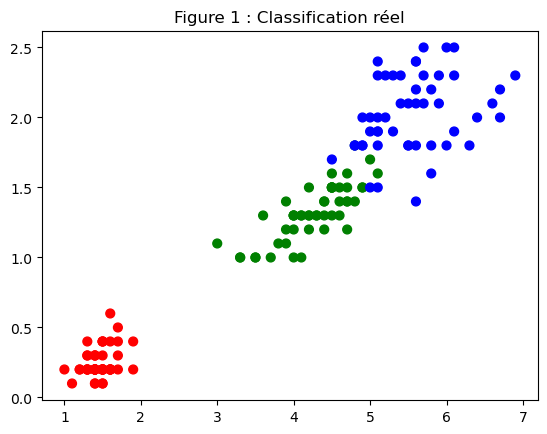

In [31]:
#Visualisation des clusters
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.title('Figure 1 : Classification réel')

### Réorganisation des étiquettes prédites par K-Means

- **`predY = np.choose(model.labels_, [1, 0, 2])`** :  
  crée un nouveau tableau `predY` contenant les **étiquettes des clusters réorganisées**.

L’algorithme K-Means attribue les numéros de clusters **aléatoirement** (par exemple, la classe *setosa* peut être étiquetée `2` au lieu de `0`).  
Cette ligne permet donc de **remapper** les labels pour mieux les faire correspondre aux vraies classes (`iris.target`).

Fonctionnement :
- `model.labels_` contient les étiquettes brutes (0, 1, 2) assignées par K-Means.  
- `[1, 0, 2]` indique **l’ordre de remplacement** :
  - toutes les étiquettes `0` deviennent `1`
  - toutes les étiquettes `1` deviennent `0`
  - toutes les étiquettes `2` restent `2`

Le tableau `predY` contient ainsi les **étiquettes ajustées** pour permettre une **meilleure comparaison visuelle et statistique** avec les classes réelles (`y.Targets`).
`


In [32]:
predY = np.choose(model.labels_, [1,0,2])
predY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visualisation de la classification obtenue par K-Means

- **`plt.scatter(x.Petal_Length, x.Petal_width, c=colormap[predY], s=40)`** :  
  trace un **nuage de points coloré** représentant la **classification prédite par l’algorithme K-Means**.  
  - **Axe X** → longueur du pétale (*Petal_Length*)  
  - **Axe Y** → largeur du pétale (*Petal_width*)  
  - **Couleur (`c=colormap[predY]`)** → étiquette de cluster prédite après réorganisation (`predY`).  
  - **`s=40`** → définit la taille des points.

- **`plt.title('Figure 2 : Classification K-means')`** :  
  ajoute un titre indiquant que le graphique représente les **clusters trouvés automatiquement** par l’algorithme K-Means.

Cette figure permet de **comparer visuellement** la répartition prédite par K-Means avec la **classification réelle** (vue dans la figure précédente).  
On peut ainsi observer la capacité du modèle à regrouper correctement les fleurs selon leurs caractéristiques, même sans connaître les vraies étiquettes.


Text(0.5, 1.0, 'Figure 2 : Classification K-means ')

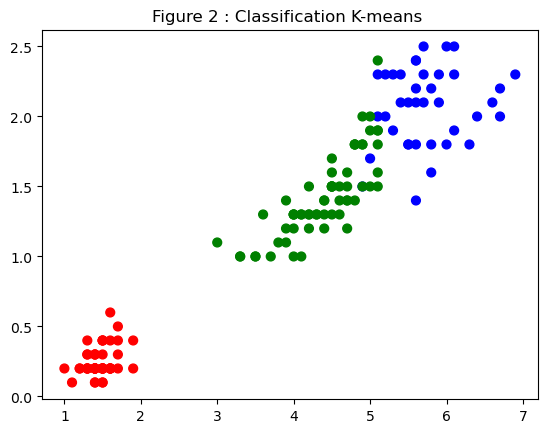

In [33]:
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[predY],s=40)
plt.title('Figure 2 : Classification K-means ')

### Contenu de la variable `predY`

- **`predY`** contient les **étiquettes des clusters prédits** par l’algorithme **K-Means**, après réorganisation à l’aide de :


In [34]:
predY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Contenu de `y.Targets`

- **`y.Targets`** : correspond à la **variable cible réelle** du jeu de données Iris.  
  Elle contient les **étiquettes (classes)** associées à chaque fleur, c’est-à-dire leur véritable espèce.

C’est une **colonne du DataFrame `y`**, créée précédemment à partir de `iris.target`.  
Chaque valeur représente une espèce de fleur sous forme numérique 


Signification des valeurs :
- `0` → *Iris setosa*  
- `1` → *Iris versicolor*  
- `2` → *Iris virginica*  

Cette colonne sert de **référence** pour comparer les **étiquettes réelles (`y.Targets`)** avec les **clusters prédits (`predY`)** par l’algorithme K-Means.


In [35]:
y.Targets

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Targets, Length: 150, dtype: int64

### Évaluation de la performance du modèle K-Means

- **`from sklearn.metrics import accuracy_score`** :  
  importe la fonction `accuracy_score` de la bibliothèque scikit-learn, utilisée pour **mesurer la précision** d’un modèle de classification.

- **`score = accuracy_score(y.Targets, predY)`** :  
  calcule la **précision du modèle K-Means** en comparant :
  - `y.Targets` → les **valeurs réelles** (les vraies classes d’iris).  
  - `predY` → les **valeurs prédites** par K-Means (étiquettes de clusters ajustées).

La précision (`accuracy`) correspond au **pourcentage de fleurs correctement classées** par rapport au total.

- **`score`** :  
  contient la **valeur numérique de la précision**, comprise entre `0` et `1` :
  - `1.0` → 100 % de bonnes classifications  
  - `0.0` → aucune classification correcte  

Cette mesure permet donc de **quantifier la performance du clustering K-Means** par rapport à la vérité terrain du jeu de données Iris.


In [36]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y.Targets,predY)
score

0.8933333333333333

### Matrice de confusion du modèle K-Means

- **`from sklearn.metrics import confusion_matrix`** :  
  importe la fonction `confusion_matrix` de scikit-learn, utilisée pour **évaluer la qualité d’un modèle de classification**.

- **`confusion_matrix(y.Targets, predY)`** :  
  génère une **matrice de confusion** comparant :
  - `y.Targets` → les **classes réelles** (valeurs correctes du dataset).  
  - `predY` → les **classes prédites** par le modèle K-Means (après réorganisation).

La matrice de confusion est une **table de correspondance** entre les vraies classes et les classes prédites :

|                | **Prédit : 0** | **Prédit : 1** | **Prédit : 2** |
|----------------|----------------|----------------|----------------|
| **Réel : 0**   | a              | b              | c              |
| **Réel : 1**   | d              | e              | f              |
| **Réel : 2**   | g              | h              | i              |

- La **diagonale principale** (a, e, i) indique le **nombre de prédictions correctes** pour chaque classe.  
- Les autres cases représentent les **erreurs de classification**.

Cette matrice permet donc d’analyser **où le modèle K-Means se trompe**,  
et de voir **quelles classes sont les mieux ou les moins bien regroupées**.


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y.Targets, predY)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])